# Reading netCDF data
- requires [numpy](http://numpy.scipy.org) and netCDF/HDF5 C libraries.
- Github site: https://github.com/Unidata/netcdf4-python
- Online docs: http://unidata.github.io/netcdf4-python/
- Based on Konrad Hinsen's old [Scientific.IO.NetCDF](http://dirac.cnrs-orleans.fr/plone/software/scientificpython/) API, with lots of added netcdf version 4 features.
- Developed by Jeff Whitaker at NOAA, with many contributions from users.

## Interactively exploring a netCDF File

Let's explore a netCDF file from the *Atlantic Real-Time Ocean Forecast System*

first, import netcdf4-python and numpy

In [1]:
!pip install netCDF4
!pip install matplotlib xarray numpy
!pip install Cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 56.0 MB/s eta 0:00:00


In [2]:
import netCDF4
import numpy as np
import numpy as np
from scipy.optimize import curve_fit
import xarray as xr
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from numpy.lib.stride_tricks import sliding_window_view

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls /content/drive/Shareddrives/TAMIDS\ Data\ Science\ Competition\ 2024/0_data

 antarctica_mass_200204_202312.txt
 Budget_TimeSeries.mat
 c3s_obs-sl_glo_phy-ssh_my_twosat-l4-duacs-0.25deg_P1D_1709513365903.nc
 CSIRO_ALT_gmsl_mo_2009.csv
 CSIRO_ALT_gmsl_yr_2009.csv
 CSIRO_Recons_gmsl_mo_2009.csv
 CSIRO_Recons_gmsl_yr_2009.csv
'CSVs from .mat files'/
 cu_sea_level_trends_4.nc
 cu_total_sea_level_change_1.nc
 data_copernicus_adt_1993_2023.nc
 download.zip
 gmsl_2023rel2_seasons_rmvd.txt
 GRCTellus.JPL.200204_202312.GLO.RL06.1M.MSCNv03CRI.nc
 Groundwaters_database.csv
 Groundwaters_summary.csv
'Ice Sheet'/
 LRD_Noise_USEastCoast.mat
 Master_D23_Github.m
 Plot_RatesallStations.m
'Sea level'/
 Temperature/


## Create a netCDF4.Dataset object
- **`f`** is a `Dataset` object, representing an open netCDF file.
- printing the object gives you summary information, similar to *`ncdump -h`*.

In [5]:
dataset = '/content/drive/Shareddrives/TAMIDS Data Science Competition 2024/0_data/data_copernicus_adt_1993_2023.nc'

In [6]:
# f = netCDF4.Dataset('data/rtofs_glo_3dz_f006_6hrly_reg3.nc')
f = netCDF4.Dataset(dataset)
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    cdm_data_type: Grid
    comment: Sea Surface Height measured by Altimetry and derived variables
    contact: http://climate.copernicus.eu/c3s-user-service-desk
    creator_email: http://climate.copernicus.eu/c3s-user-service-desk
    creator_name: Copernicus Climate Change Service (C3S)
    creator_url: http://climate.copernicus.eu
    date_created: 2021-07-09T08:53:57Z
    date_issued: 2021-07-09T08:53:57Z
    date_modified: 2021-07-09T08:53:57Z
    geospatial_lat_max: 89.875
    geospatial_lat_min: -89.875
    geospatial_lat_resolution: 0.25
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 179.875
    geospatial_lon_min: -179.875
    geospatial_lon_resolution: 0.25
    geospatial_lon_units: degrees_east
    geospatial_vertical_max: 0.0
    geospatial_vertical_min: 0.0
    geospatial_vertical_positive:

## Access a netCDF variable
- variable objects stored by name in **`variables`** dict.
- print the variable yields summary info (including all the attributes).
- no actual data read yet (just have a reference to the variable object with metadata).

In [7]:
# Load the dataset
ds = xr.open_dataset(dataset)
adt_avg = ds['adt'].mean(dim=['latitude', 'longitude'])

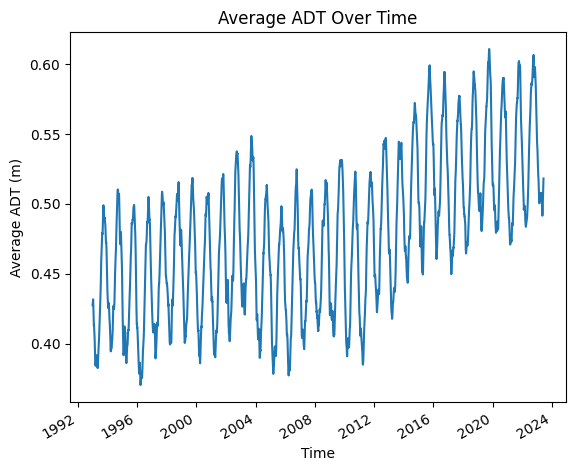

In [8]:
# Plotting the averaged ADT time series
adt_avg.plot()
plt.title('Average ADT Over Time')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

## Data Preprocessing - Normalization



In [9]:
ds

<xarray.Dataset>
Dimensions:    (time: 11115, latitude: 152, longitude: 204)
Coordinates:
  * latitude   (latitude) float32 14.12 14.38 14.62 14.88 ... 51.38 51.62 51.88
  * longitude  (longitude) float32 -100.9 -100.6 -100.4 ... -50.62 -50.38 -50.12
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2023-06-07
Data variables:
    adt        (time, latitude, longitude) float64 0.78 0.8006 ... -0.4317
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...
    copernicusmarine_version:        1.0.3

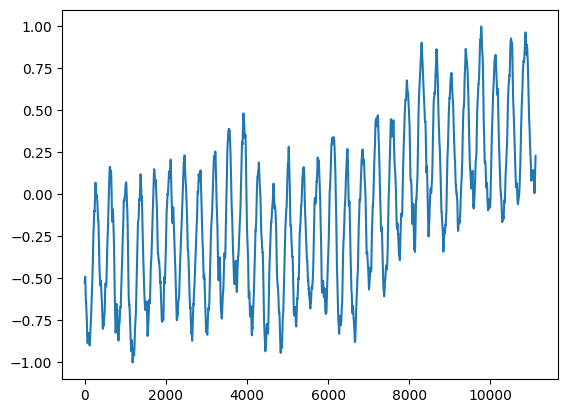

In [10]:
adt_avg.values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(-1, 1))
adt_avg_scaled = scaler.fit_transform(adt_avg.values.reshape(-1,1))
plt.plot(adt_avg_scaled)

## Data Preprocessing - Filtering

In [11]:
adt_avg_scaled.shape

(11115, 1)

Before filtering: (11115, 1)
Before filtering: (11066, 1)


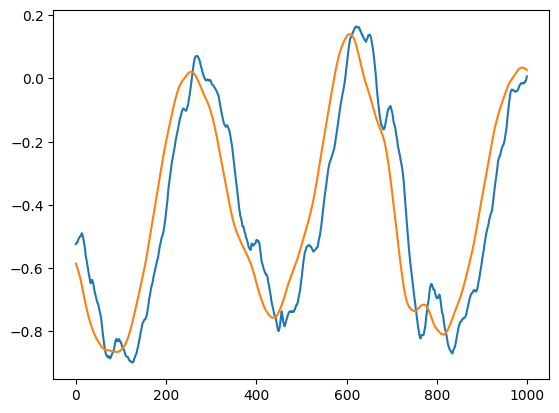

In [12]:
window_size = 50
adt_avg_smoothed = sliding_window_view(adt_avg_scaled.flatten(), window_shape=window_size).mean(axis=-1).reshape(-1,1)
print("Before filtering: {}".format(adt_avg_scaled.shape))
print("Before filtering: {}".format(adt_avg_smoothed.shape))
plt.plot(adt_avg_scaled[:1000])
plt.plot(adt_avg_smoothed[:1000])

## LSTM

In [13]:
adt_avg

<xarray.DataArray 'adt' (time: 11115)>
array([0.42764462, 0.42803857, 0.42826588, ..., 0.51741171, 0.51767367,
       0.51815527])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2023-06-07

In [14]:
import numpy as np

# adt_data_used = adt_avg_scaled
adt_data_used = adt_avg_smoothed

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Assuming adt_data is your normalized ADT data as a flat numpy array
n_steps = 356 * 5  # Number of days to use for prediction. This can be tuned.
X, y = create_sequences(adt_data_used.flatten(), n_steps)

# Reshape X to be [samples, time steps, features] which is required for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))


In [15]:
# Split the dataset (80% training, 20% testing)
split_ix = int(len(X) * 0.8)
X_train, X_test = X[:split_ix], X[split_ix:]
y_train, y_test = y[:split_ix], y[split_ix:]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='tanh', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


Epoch 1/20
233/233 [==============================] - 18s 57ms/step - loss: 0.0069 - val_loss: 4.2211e-04
Epoch 2/20
233/233 [==============================] - 13s 54ms/step - loss: 7.8013e-05 - val_loss: 7.7093e-05
Epoch 3/20
233/233 [==============================] - 12s 53ms/step - loss: 3.8323e-05 - val_loss: 5.7742e-05
Epoch 4/20
233/233 [==============================] - 12s 52ms/step - loss: 3.3202e-05 - val_loss: 4.8949e-05
Epoch 5/20
233/233 [==============================] - 14s 61ms/step - loss: 3.0730e-05 - val_loss: 4.0466e-05
Epoch 6/20
233/233 [==============================] - 12s 53ms/step - loss: 2.6553e-05 - val_loss: 3.5356e-05
Epoch 7/20
233/233 [==============================] - 12s 53ms/step - loss: 2.4246e-05 - val_loss: 4.0959e-05
Epoch 8/20
233/233 [==============================] - 12s 53ms/step - loss: 2.1030e-05 - val_loss: 2.1826e-05
Epoch 9/20
233/233 [==============================] - 12s 53ms/step - loss: 1.9285e-05 - val_loss: 1.8261e-05
Epoch 10/20
23

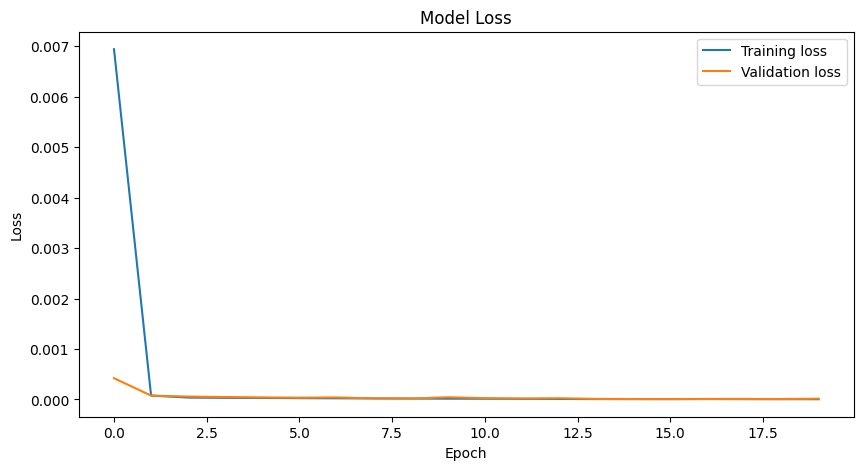

In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [18]:
# Example for evaluating the model
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Test MSE: {mse}')

# Example for making a single step prediction
last_sequence = X[-1:]  # The last available sequence in the dataset
next_adt_prediction = model.predict(last_sequence)


59/59 [==============================] - 2s 30ms/step
Test MSE: 1.6475134807534704e-05
1/1 [==============================] - 0s 57ms/step


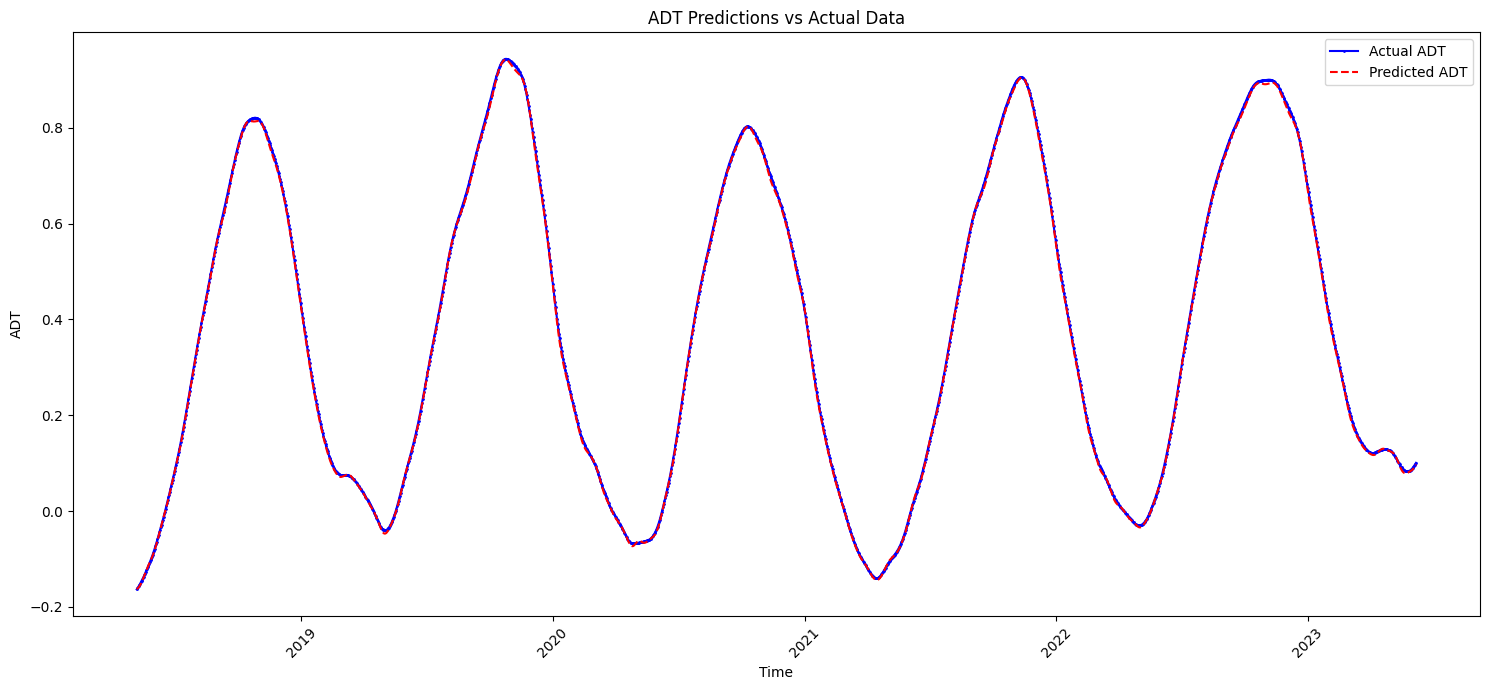

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the time values for the test set
# Assuming the length of 'y_test' and 'predictions' match and correspond to the end portion of the dataset
test_dates = ds['time'].values[-len(y_test):]

# Convert numpy datetime64 to datetime for plotting
test_dates = pd.to_datetime(test_dates)

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(test_dates, y_test, label='Actual ADT', color='blue', marker='.', linestyle='-', markersize=2)
plt.plot(test_dates, predictions.flatten(), label='Predicted ADT', color='red', linestyle='--', markersize=2)
plt.xlabel('Time')
plt.ylabel('ADT')
plt.title('ADT Predictions vs Actual Data')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()



In [20]:
# Assuming `n_steps` is the number of time steps your model expects as input
# Let's start with the last sequence of actual ADT data
last_sequence = X[-1:]  # The last sequence from the preprocessed data

# Initialize an array to store the predictions
future_predictions = []

# Calculate the number of days in 10 years (approximate, not accounting for leap years)
n_days = 5 * 365

for _ in range(n_days):
    # Predict the next ADT value
    next_adt_pred = model.predict(last_sequence)

    # Ensure next_adt_pred is correctly reshaped for appending
    # It should be reshaped from (1,) to (1, 1, 1) to match the expected input shape
    next_adt_pred_reshaped = next_adt_pred.reshape((1, 1, 1))

    # Append the prediction to the future_predictions list
    future_predictions.append(next_adt_pred[0, 0])  # Assuming the model outputs a single value


    # Update the last_sequence to include the new prediction
    # Here, we make sure to slice last_sequence to remove the oldest time step and append the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], next_adt_pred_reshaped, axis=1)


# Convert future_predictions to a numpy array for easier handling
future_predictions = np.array(future_predictions)

# (Optional) Convert the list of predictions into a DataArray for plotting or analysis
future_dates = pd.date_range(start=ds['time'].values[-1] + np.timedelta64(1, 'D'), periods=n_days, freq='D')
future_adt_data = xr.DataArray(future_predictions, coords=[future_dates], dims=["time"])


1/1 [==============================] - 0s 39ms/step


In [21]:
future_predictions.shape

(1825,)

In [22]:
future_adt_data

<xarray.DataArray (time: 1825)>
array([ 0.09698214,  0.09930135,  0.1013999 , ..., -0.13742188,
       -0.13746597, -0.13751404], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2023-06-08 2023-06-09 ... 2028-06-05

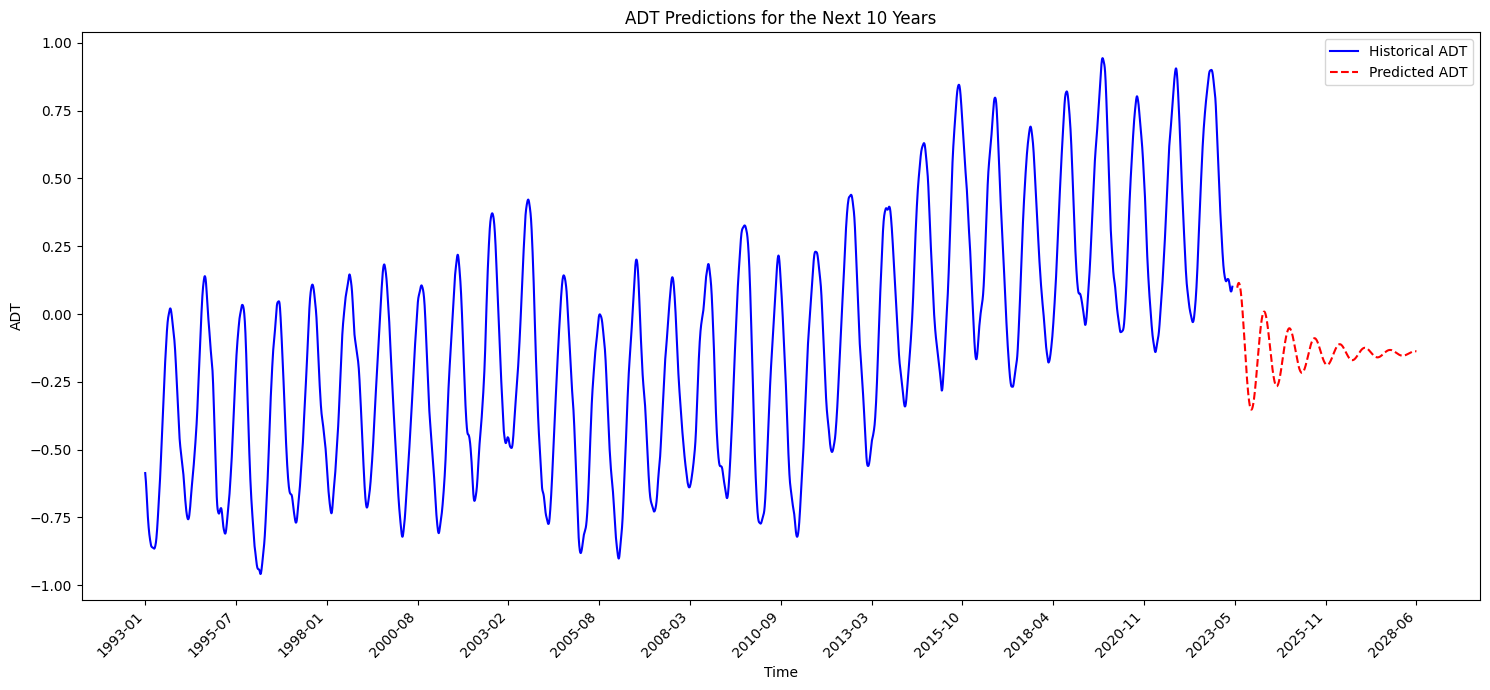

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot the original ADT data
plt.figure(figsize=(15, 7))
plt.plot(ds['time'][:11066], adt_data_used.flatten(), label='Historical ADT', color='blue')

# Now plot the future predictions
# Ensure future_adt_data has the correct datetime index for plotting
plt.plot(future_adt_data['time'], future_adt_data, label='Predicted ADT', color='red', linestyle='--')

plt.xlabel('Time')
plt.ylabel('ADT')
plt.title('ADT Predictions for the Next 10 Years')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Since we're dealing with a long time range, you might want to adjust the x-axis to display dates more neatly
# One way is to select a subset of dates to label the x-axis
locator = pd.date_range(start=ds['time'].values.min(), end=future_adt_data['time'].values.max(), periods=15)
plt.gca().set_xticks(locator)
plt.gca().set_xticklabels([pd.to_datetime(date).strftime('%Y-%m') for date in locator], rotation=45, ha="right")

plt.tight_layout()  # Adjust layout
plt.show()


## FFT

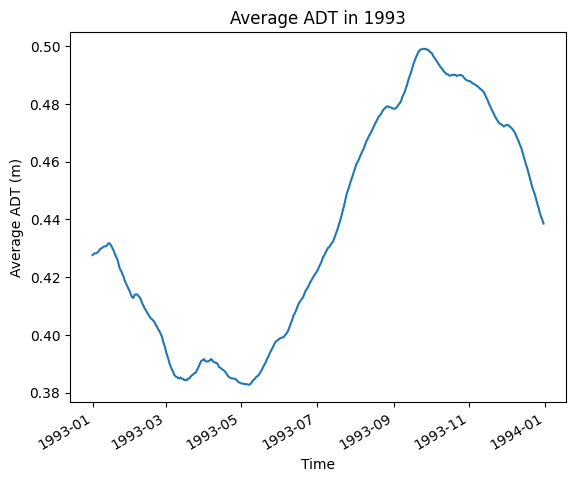

In [ ]:
adt_avg_1993 = adt_avg[:365]
adt_avg_1993.plot()
plt.title('Average ADT in 1993')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

In [ ]:
adt_fft = np.fft.fft(adt_avg.values)
adt_freq = np.fft.fftfreq(adt_avg.size, d=(1/365.25))

power_spectrum = np.abs(adt_fft)**2



In [ ]:


# Find the index of the maximum power, ignoring the zero frequency component
non_zero_indices = np.arange(1, len(power_spectrum)//2)  # Exclude zero frequency
dominant_index = non_zero_indices[np.argmax(power_spectrum[non_zero_indices])]
dominant_freq = adt_freq[dominant_index]
dominant_amplitude = (2.0 / len(adt_fft)) * np.abs(adt_fft[dominant_index])

dominant_phase = np.angle(adt_fft[dominant_index])
print("dominant freq = {}, amplitude = {}".format(dominant_freq, dominant_amplitude))

dominant freq = 0.9858299595141702, amplitude = 0.03988730144022593


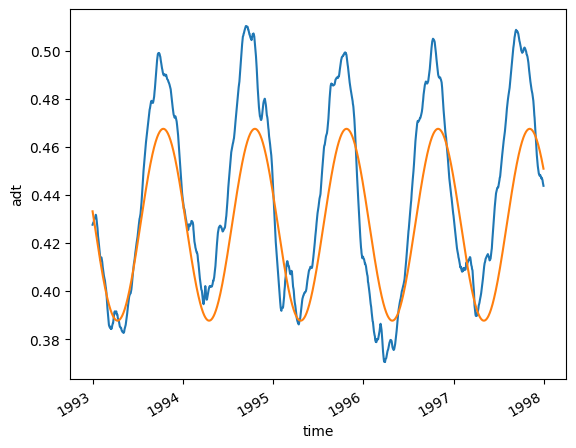

In [ ]:
import numpy as np

# Model the sine wave of the dominant frequency
t = np.arange(len(adt_avg)) / 365.25  # Convert index to years for daily data
modeled_sine = dominant_amplitude * np.sin(2 * np.pi * dominant_freq * t + dominant_phase) + adt_avg_1993[0].values

# Subtract the modeled sine wave from the original ADT data to get residuals
adt_residuals = adt_avg - modeled_sine

t.shape
year = 5
adt_avg[:365*year].plot()
plt.plot(adt_avg[:365*year].time, modeled_sine[:365*year])


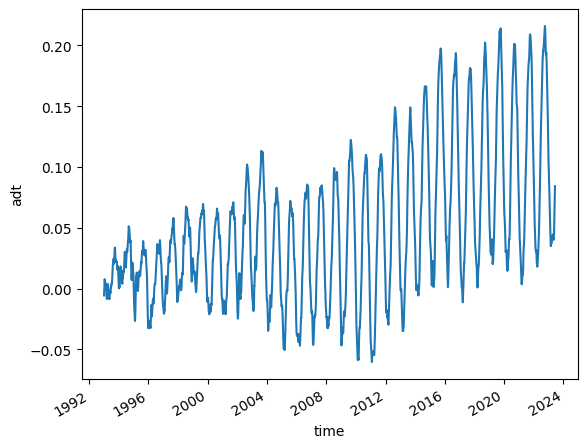

In [ ]:
adt_residuals.plot()

In [ ]:
positive_indices = adt_freq >= 0
positive_freqs = adt_freq[positive_indices]
positive_magnitude = adt_fft[positive_indices]



/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


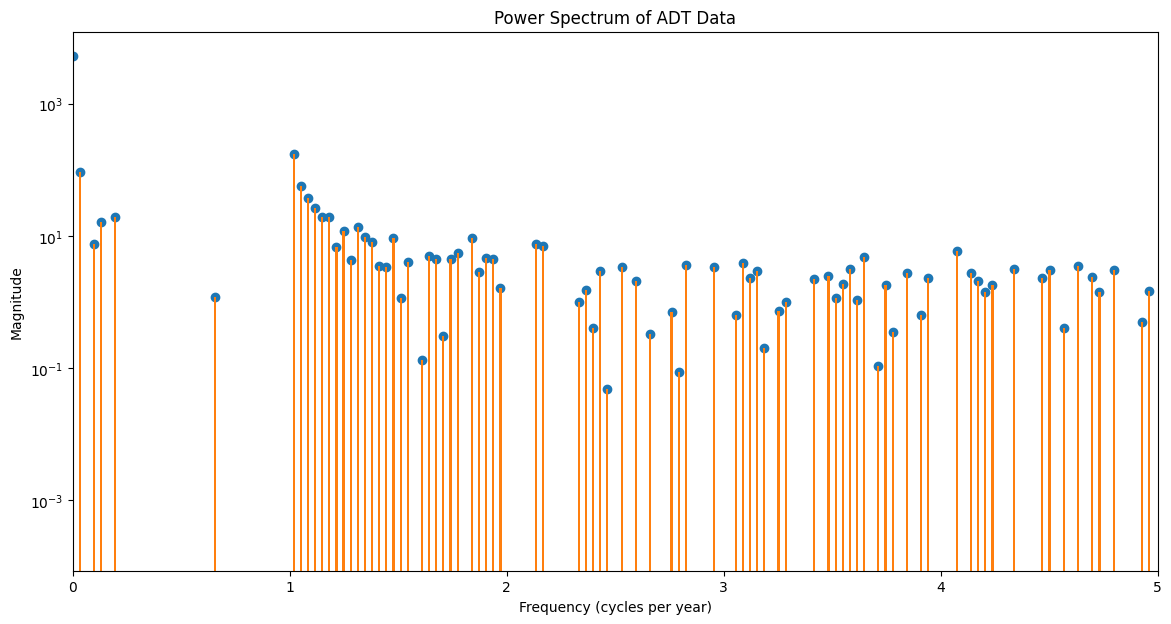

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(positive_freqs, positive_magnitude)
plt.bar(positive_freqs, positive_magnitude, width=0.01)
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Magnitude')
plt.title('Power Spectrum of ADT Data')
plt.xlim(0, 5)  # Limit frequency to 1 cycle per year to focus on annual and sub-annual frequencies
# plt.ylim(-0.)
plt.yscale("log")
plt.show()

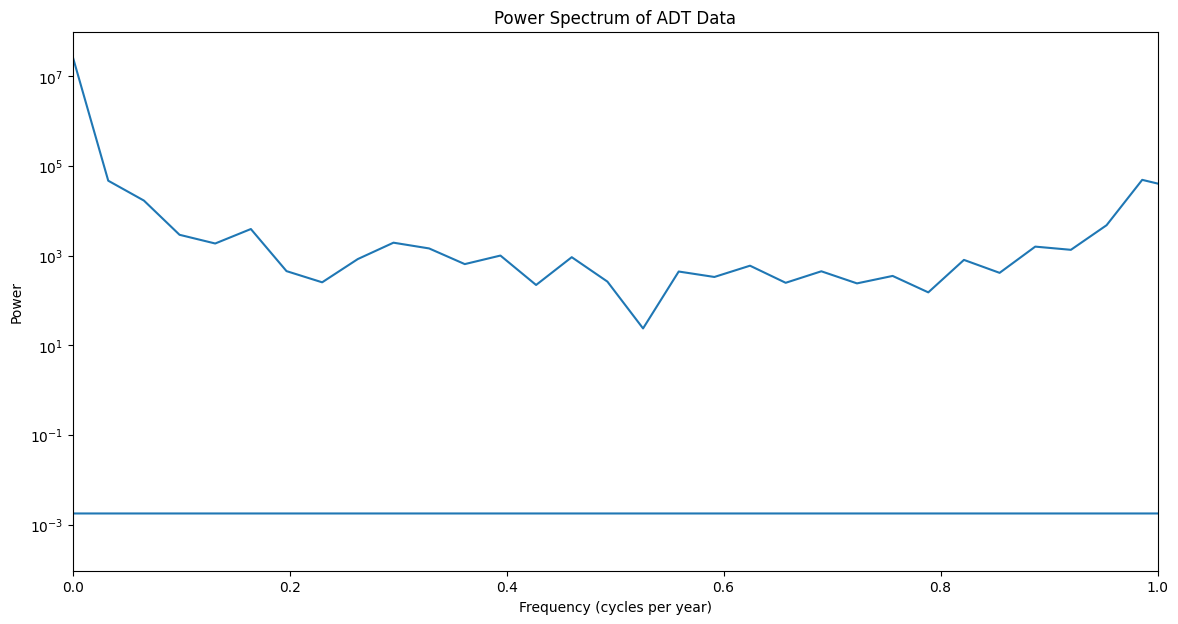

Peak periods in years: [ 1.01437372 30.4312115 ]
Peak Freqs: [ 0.         -0.98582996  0.98582996  0.032861   -0.032861  ]
Peak Freq Powers: [28131272.4430045     49139.21940901    49139.21940901    47020.45781214
    47020.45781214]


In [ ]:
# Get the power spectrum (squared magnitude of the FFT)
adt_power = np.abs(adt_fft)**2

# Plot the power spectrum
plt.figure(figsize=(14, 7))
plt.plot(adt_freq, adt_power)
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Power')
plt.title('Power Spectrum of ADT Data')
plt.xlim(0, 1)  # Limit frequency to 1 cycle per year to focus on annual and sub-annual frequencies
plt.yscale("log")
plt.show()

# You may also want to identify the peak frequencies and their corresponding periods
peak_freqs = adt_freq[adt_power.argsort()[-1::-1][:5]]  # Top 5 peak frequencies
peak_freqs_power = adt_power[adt_power.argsort()[-1::-1][:5]]  # Top 5 peak frequencies
peak_periods = 1 / peak_freqs[peak_freqs > 0]  # Calculate periods, ignore zero (mean) frequency

print(f"Peak periods in years: {peak_periods}")
print("Peak Freqs: {}".format(peak_freqs))
print("Peak Freq Powers: {}".format(peak_freqs_power))

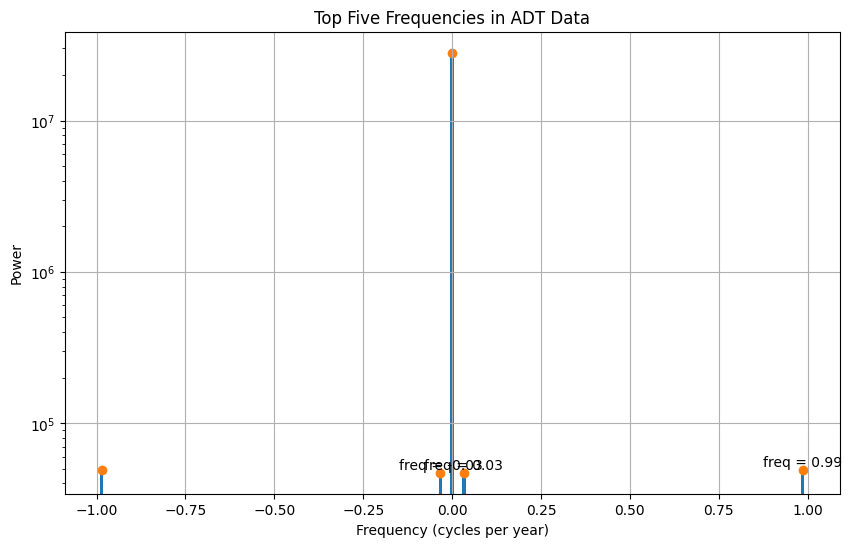

In [ ]:
# Assuming 'adt_freq' and 'adt_power' are your arrays of frequencies and power values from the FFT
# Let's find the top five frequencies and their power values
indices = np.argsort(adt_power)[-5:]  # Get the indices of the top 5 powers
top_freqs = adt_freq[indices]  # Get the top 5 frequencies
top_powers = adt_power[indices]  # Get the top 5 power values

# Now, let's create a bar plot for these top five frequencies and their powers
plt.figure(figsize=(10, 6))
plt.bar(top_freqs, top_powers, width=0.01)  # A small width to make bars look like lines
plt.scatter(top_freqs, top_powers)
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Power')
plt.title('Top Five Frequencies in ADT Data')
plt.grid(True)
plt.yscale("log")
for i, txt in enumerate(top_powers[top_freqs>=0]):
    plt.text(top_freqs[i], top_powers[i], "freq = {:4.2f}".format(top_freqs[i]), ha='center', va='bottom')
plt.show()

In [ ]:
time = ds['adt'].time.values

In [ ]:
# t = time.astype('datetime64[Y]').astype(int) + 1970
dates = (time - np.datetime64('1993-01-01')).astype('timedelta64[D]').astype(int)
dates

array([    0,     1,     2, ..., 11112, 11113, 11114])

In [ ]:
# Define the model function
def adt_model(t, A, f, phi, W0, W1, W2, W3):
    return A * np.sin(2 * np.pi * f * t + phi) + W0 + W1 * t + W2 * t * t + W3 * t * t * t

# Initial guess for the parameters
initial_guess = [max(adt_avg[:400]) - min(adt_avg[:400]), 1, 0, np.mean(adt_avg[:365]), 0, 0, 0]

# Fit the model to the data
params, covariance = curve_fit(adt_model, dates, adt_avg, p0=initial_guess)

In [ ]:
params

array([0.11635153, 1.        , 0.        , 0.43649247, 0.        ,
       0.        , 0.        ])

In [ ]:
covariance

array([[ 4.51961842e+12,  1.24839352e+06, -1.68567321e+10,
         1.96130649e+09, -9.12648322e+05,  3.70592224e-06,
         1.02322212e-09],
       [ 1.24839352e+06,  9.87518969e+02, -3.18737511e+04,
         3.70855951e+03, -7.21933835e+02, -6.13547000e-12,
         1.05513578e-12],
       [-1.68567321e+10, -3.18737511e+04,  1.81994775e+11,
        -2.11753697e+10,  2.33015672e+04, -2.90354623e-07,
        -1.00592453e-11],
       [ 1.96130649e+09,  3.70855951e+03, -2.11753697e+10,
         2.46378656e+09, -2.71117285e+03,  3.37840119e-08,
         1.17036604e-12],
       [-9.12648322e+05, -7.21933835e+02,  2.33015672e+04,
        -2.71117285e+03,  5.27775646e+02,  4.48456702e-12,
        -7.71365612e-13],
       [ 3.70592224e-06, -6.13547000e-12, -2.90354623e-07,
         3.37840119e-08,  4.48456702e-12,  1.76782290e-19,
        -1.03162091e-23],
       [ 1.02322212e-09,  1.05513578e-12, -1.00592453e-11,
         1.17036604e-12, -7.71365612e-13, -1.03162091e-23,
         1.7458076

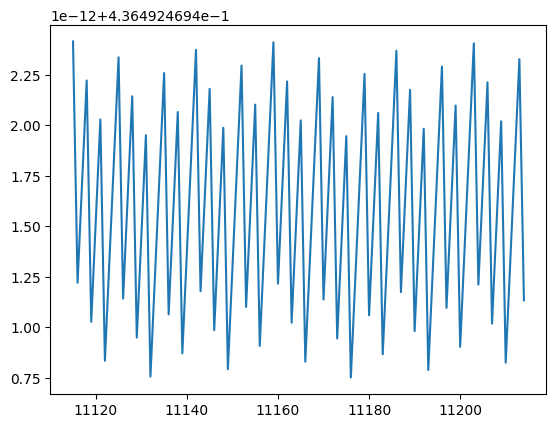

In [ ]:
future_dates = np.arange(11115, 11115+100, 1)
predicted_avg_adt = adt_model(future_dates, *params)

plt.plot(future_dates, predicted_avg_adt)

In [ ]:
adt_avg

<xarray.DataArray 'adt' (time: 11115)>
array([0.42764462, 0.42803857, 0.42826588, ..., 0.51741171, 0.51767367,
       0.51815527])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2023-06-07

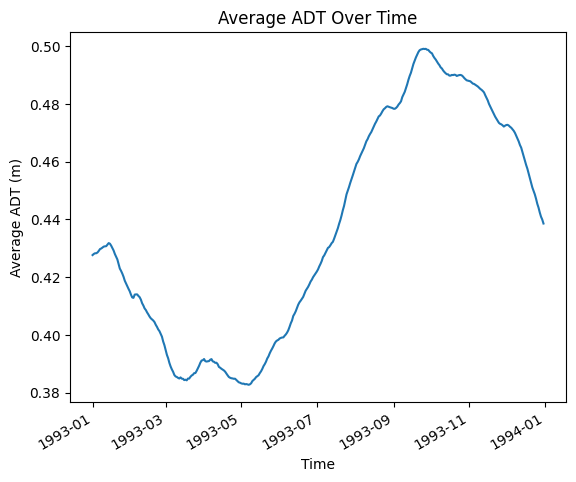

In [ ]:
adt_avg = ds['adt'].mean(dim=['latitude', 'longitude'])
# Plotting the averaged ADT time series
adt_avg[:365].plot()
plt.title('Average ADT Over Time')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

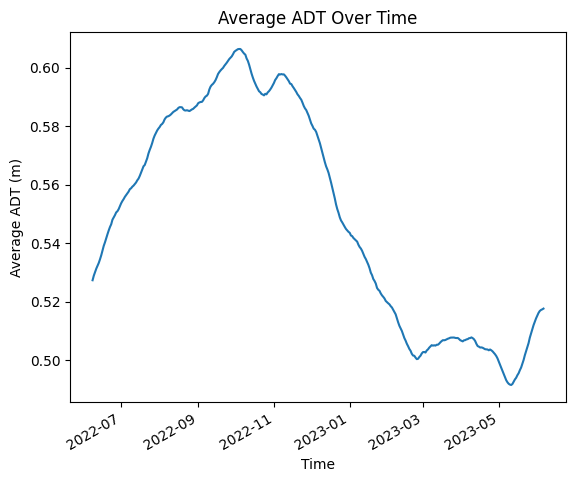

In [ ]:
adt_avg = ds['adt'].mean(dim=['latitude', 'longitude'])
# Plotting the averaged ADT time series
adt_avg[11115-365:11115-1].plot()
plt.title('Average ADT Over Time')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

In [ ]:
adt_avg.values.shape

(11115,)

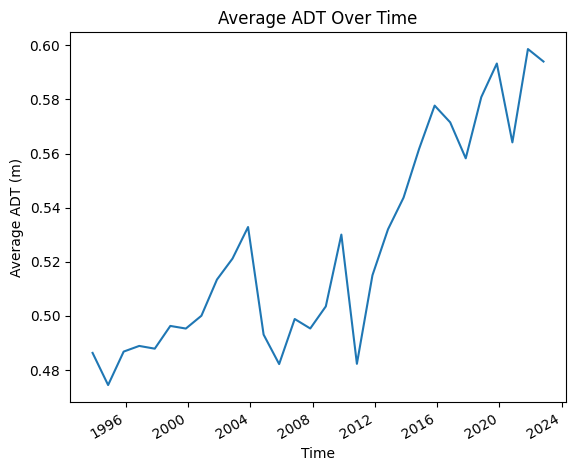

In [ ]:
adt_avg = ds['adt'].mean(dim=['latitude', 'longitude'])
# Plotting the averaged ADT time series
adt_avg[10*31:11115:365].plot()
plt.title('Average ADT Over Time')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

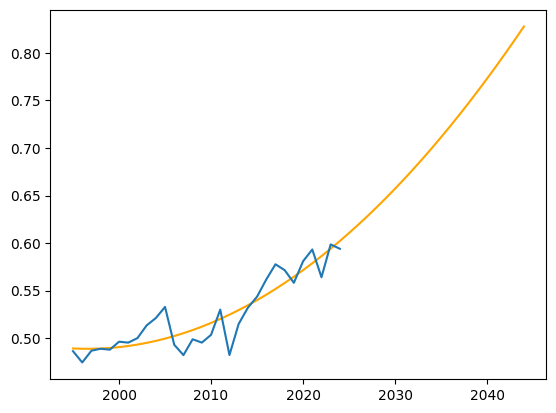

In [ ]:
adt_sep = adt_avg[10*31:11115:365]
year_values = np.arange(1995, 2025, 1)
adt_sep_values = adt_sep.values

degree = 2

adt_sep_values = np.array(adt_sep_values)
# adt_sep_values.shape
# year_values.shape


coefficients = np.polyfit(year_values, adt_sep_values, degree)
coefficients

poly_func = np.poly1d(coefficients)

pred_year_values = np.arange(1995, 2045, 1)
predicted_adt = poly_func(pred_year_values)

plt.plot(pred_year_values, predicted_adt, color = 'orange')
plt.plot(year_values, adt_sep_values)


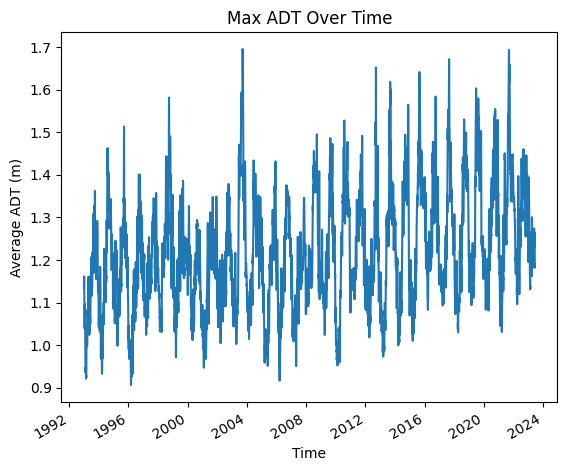

In [ ]:
adt_max = ds['adt'].max(dim=['latitude', 'longitude'])
# Plotting the averaged ADT time series
adt_max.plot()
plt.title('Max ADT Over Time')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

In [ ]:
# Group by year and calculate the max ADT for each group
adt_per_year = ds['adt'].groupby('time.year')

# # Print or inspect the result
# # print(adt_max_per_year)

# adt_max_per_year.plot()
# plt.title('Maximum ADT per Year')
# plt.xlabel('Year')
# plt.ylabel('Max ADT (m)')
# plt.grid(True)
# plt.show()

In [ ]:
adt_per_year

DataArrayGroupBy, grouped over 'year'
31 groups with labels 1993, 1994, 1995, ..., 2022, 2023.

In [ ]:
ds

<xarray.Dataset>
Dimensions:    (time: 11115, latitude: 152, longitude: 204)
Coordinates:
  * latitude   (latitude) float32 14.12 14.38 14.62 14.88 ... 51.38 51.62 51.88
  * longitude  (longitude) float32 -100.9 -100.6 -100.4 ... -50.62 -50.38 -50.12
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2023-06-07
Data variables:
    adt        (time, latitude, longitude) float64 0.78 0.8006 ... -0.4317
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...
    copernicusmarine_version:        1.0.3

In [ ]:
# Filter for January 1st of each year
adt_jan_1st = ds['adt'].sel(time=ds['time'].dt.month == 1,
                            time=ds['time'].dt.day == 1)


SyntaxError: keyword argument repeated: time (<ipython-input-49-2b4b74554e87>, line 3)